# Decision Tree - CA - heart.csv

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12, 10
sb.set_style('whitegrid')

In [2]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [3]:
x = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

df[:5]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
pd.options.display.float_format = '{:.4f}'.format
x_df = pd.DataFrame(x)
print(x_df.describe())

            0        1        2        3        4        5        6        7   \
count 303.0000 303.0000 303.0000 303.0000 303.0000 303.0000 303.0000 303.0000   
mean   54.3663   0.6832   0.9670 131.6238 246.2640   0.1485   0.5281 149.6469   
std     9.0821   0.4660   1.0321  17.5381  51.8308   0.3562   0.5259  22.9052   
min    29.0000   0.0000   0.0000  94.0000 126.0000   0.0000   0.0000  71.0000   
25%    47.5000   0.0000   0.0000 120.0000 211.0000   0.0000   0.0000 133.5000   
50%    55.0000   1.0000   1.0000 130.0000 240.0000   0.0000   1.0000 153.0000   
75%    61.0000   1.0000   2.0000 140.0000 274.5000   0.0000   1.0000 166.0000   
max    77.0000   1.0000   3.0000 200.0000 564.0000   1.0000   2.0000 202.0000   

            8        9        10       11       12  
count 303.0000 303.0000 303.0000 303.0000 303.0000  
mean    0.3267   1.0396   1.3993   0.7294   2.3135  
std     0.4698   1.1611   0.6162   1.0226   0.6123  
min     0.0000   0.0000   0.0000   0.0000   0.0000  
25%  

In [5]:
# for index 4, chol
# IQR = value@75% - value@25% = 274.5 - 211.0 = 63.5
# (1.5)IQR = 95.25

# 274.5 - 95.25 = 179.25
# 211 + 95.25 = 306.25

# as min chol is 126.0, it falls below 179.25, highly likely an outlier. to investigate further

In [6]:
chol = x[:, 4]

outliers = (chol > 500)
df[outliers]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
85   67    0   2     115   564    0        0       160     0   1.6000    1   

    caa  thall  output  
85    0      3       1

In [7]:
chol = x[:, 4]

outliers = (chol < 150)
df[outliers]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
53    44    0   2     108   141    0        1       175     0   0.6000    1   
111   57    1   2     150   126    1        1       173     0   0.2000    2   
151   71    0   0     112   149    0        1       125     0   1.6000    1   
267   49    1   2     118   149    0        0       126     0   0.8000    2   
301   57    1   0     130   131    0        1       115     1   1.2000    1   

     caa  thall  output  
53     0      2       1  
111    1      3       1  
151    0      2       1  
267    3      2       0  
301    1      3       0

In [8]:
# for index 0, age
# IQR = value@75% - value@25% = 61.0 - 47.5 = 13.5
# (1.5)IQR = 20.25

# 61.0 - 20.25 = 40.75
# 47.5 + 20.25 = 67.75

# as min age is 29.0, it falls below 40.75, highly likely an outlier. to investigate further

In [9]:
age = x[:, 0]

outliers = (age > 67.75)
df[outliers]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
19    69    0   3     140   239    0        1       151     0   1.8000    2   
25    71    0   1     160   302    0        1       162     0   0.4000    2   
60    71    0   2     110   265    1        0       130     0   0.0000    2   
86    68    1   2     118   277    0        1       151     0   1.0000    2   
105   68    0   2     120   211    0        0       115     0   1.5000    1   
106   69    1   3     160   234    1        0       131     0   0.1000    1   
129   74    0   1     120   269    0        0       121     1   0.2000    2   
144   76    0   2     140   197    0        2       116     0   1.1000    1   
145   70    1   1     156   245    0        0       143     0   0.0000    2   
151   71    0   0     112   149    0        1       125     0   1.6000    1   
203   68    1   2     180   274    1        0       150     1   1.6000    1   
225   70    1   0     145   174    0        1       125     1   2.6000    0   
234   70    1   0     130   322    0        0       109     0   2.4000    1   
238   77    1   0     125   304    0        0       162     1   0.0000    2   
240   70    1   2     160   269    0        1       112     1   2.9000    1   
249   69    1   2     140   254    0        0       146     0   2.0000    1   
300   68    1   0     144   193    1        1       141     0   3.4000    1   

     caa  thall  output  
19     2      2       1  
25     2      2       1  
60     1      2       1  
86     1      3       1  
105    0      2       1  
106    1      2       1  
129    1      2       1  
144    0      2       1  
145    0      2       1  
151    0      2       1  
203    0      3       0  
225    0      3       0  
234    3      2       0  
238    3      2       0  
240    1      3       0  
249    3      3       0  
300    2      3       0

In [10]:
age_ = x[:, 0]

outliers = (age_ < 40)
df[outliers]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
1     37    1   2     130   250    0        1       187     0   3.5000    0   
44    39    1   2     140   321    0        0       182     0   0.0000    2   
58    34    1   3     118   182    0        0       174     0   0.0000    2   
65    35    0   0     138   183    0        1       182     0   1.4000    2   
72    29    1   1     130   204    0        0       202     0   0.0000    2   
115   37    0   2     120   215    0        1       170     0   0.0000    2   
124   39    0   2      94   199    0        1       179     0   0.0000    2   
125   34    0   1     118   210    0        1       192     0   0.7000    2   
154   39    0   2     138   220    0        1       152     0   0.0000    1   
157   35    1   1     122   192    0        1       174     0   0.0000    2   
163   38    1   2     138   175    0        1       173     0   0.0000    2   
164   38    1   2     138   175    0        1       173     0   0.0000    2   
212   39    1   0     118   219    0        1       140     0   1.2000    1   
227   35    1   0     120   198    0        1       130     1   1.6000    1   
239   35    1   0     126   282    0        0       156     1   0.0000    2   
259   38    1   3     120   231    0        1       182     1   3.8000    1   

     caa  thall  output  
1      0      2       1  
44     0      2       1  
58     0      2       1  
65     0      2       1  
72     0      2       1  
115    0      2       1  
124    0      2       1  
125    0      2       1  
154    0      2       1  
157    0      2       1  
163    4      2       1  
164    4      2       1  
212    0      3       0  
227    0      3       0  
239    0      3       0  
259    0      3       0

In [11]:
df[outliers].count()

age         16
sex         16
cp          16
trtbps      16
chol        16
fbs         16
restecg     16
thalachh    16
exng        16
oldpeak     16
slp         16
caa         16
thall       16
output      16
dtype: int64

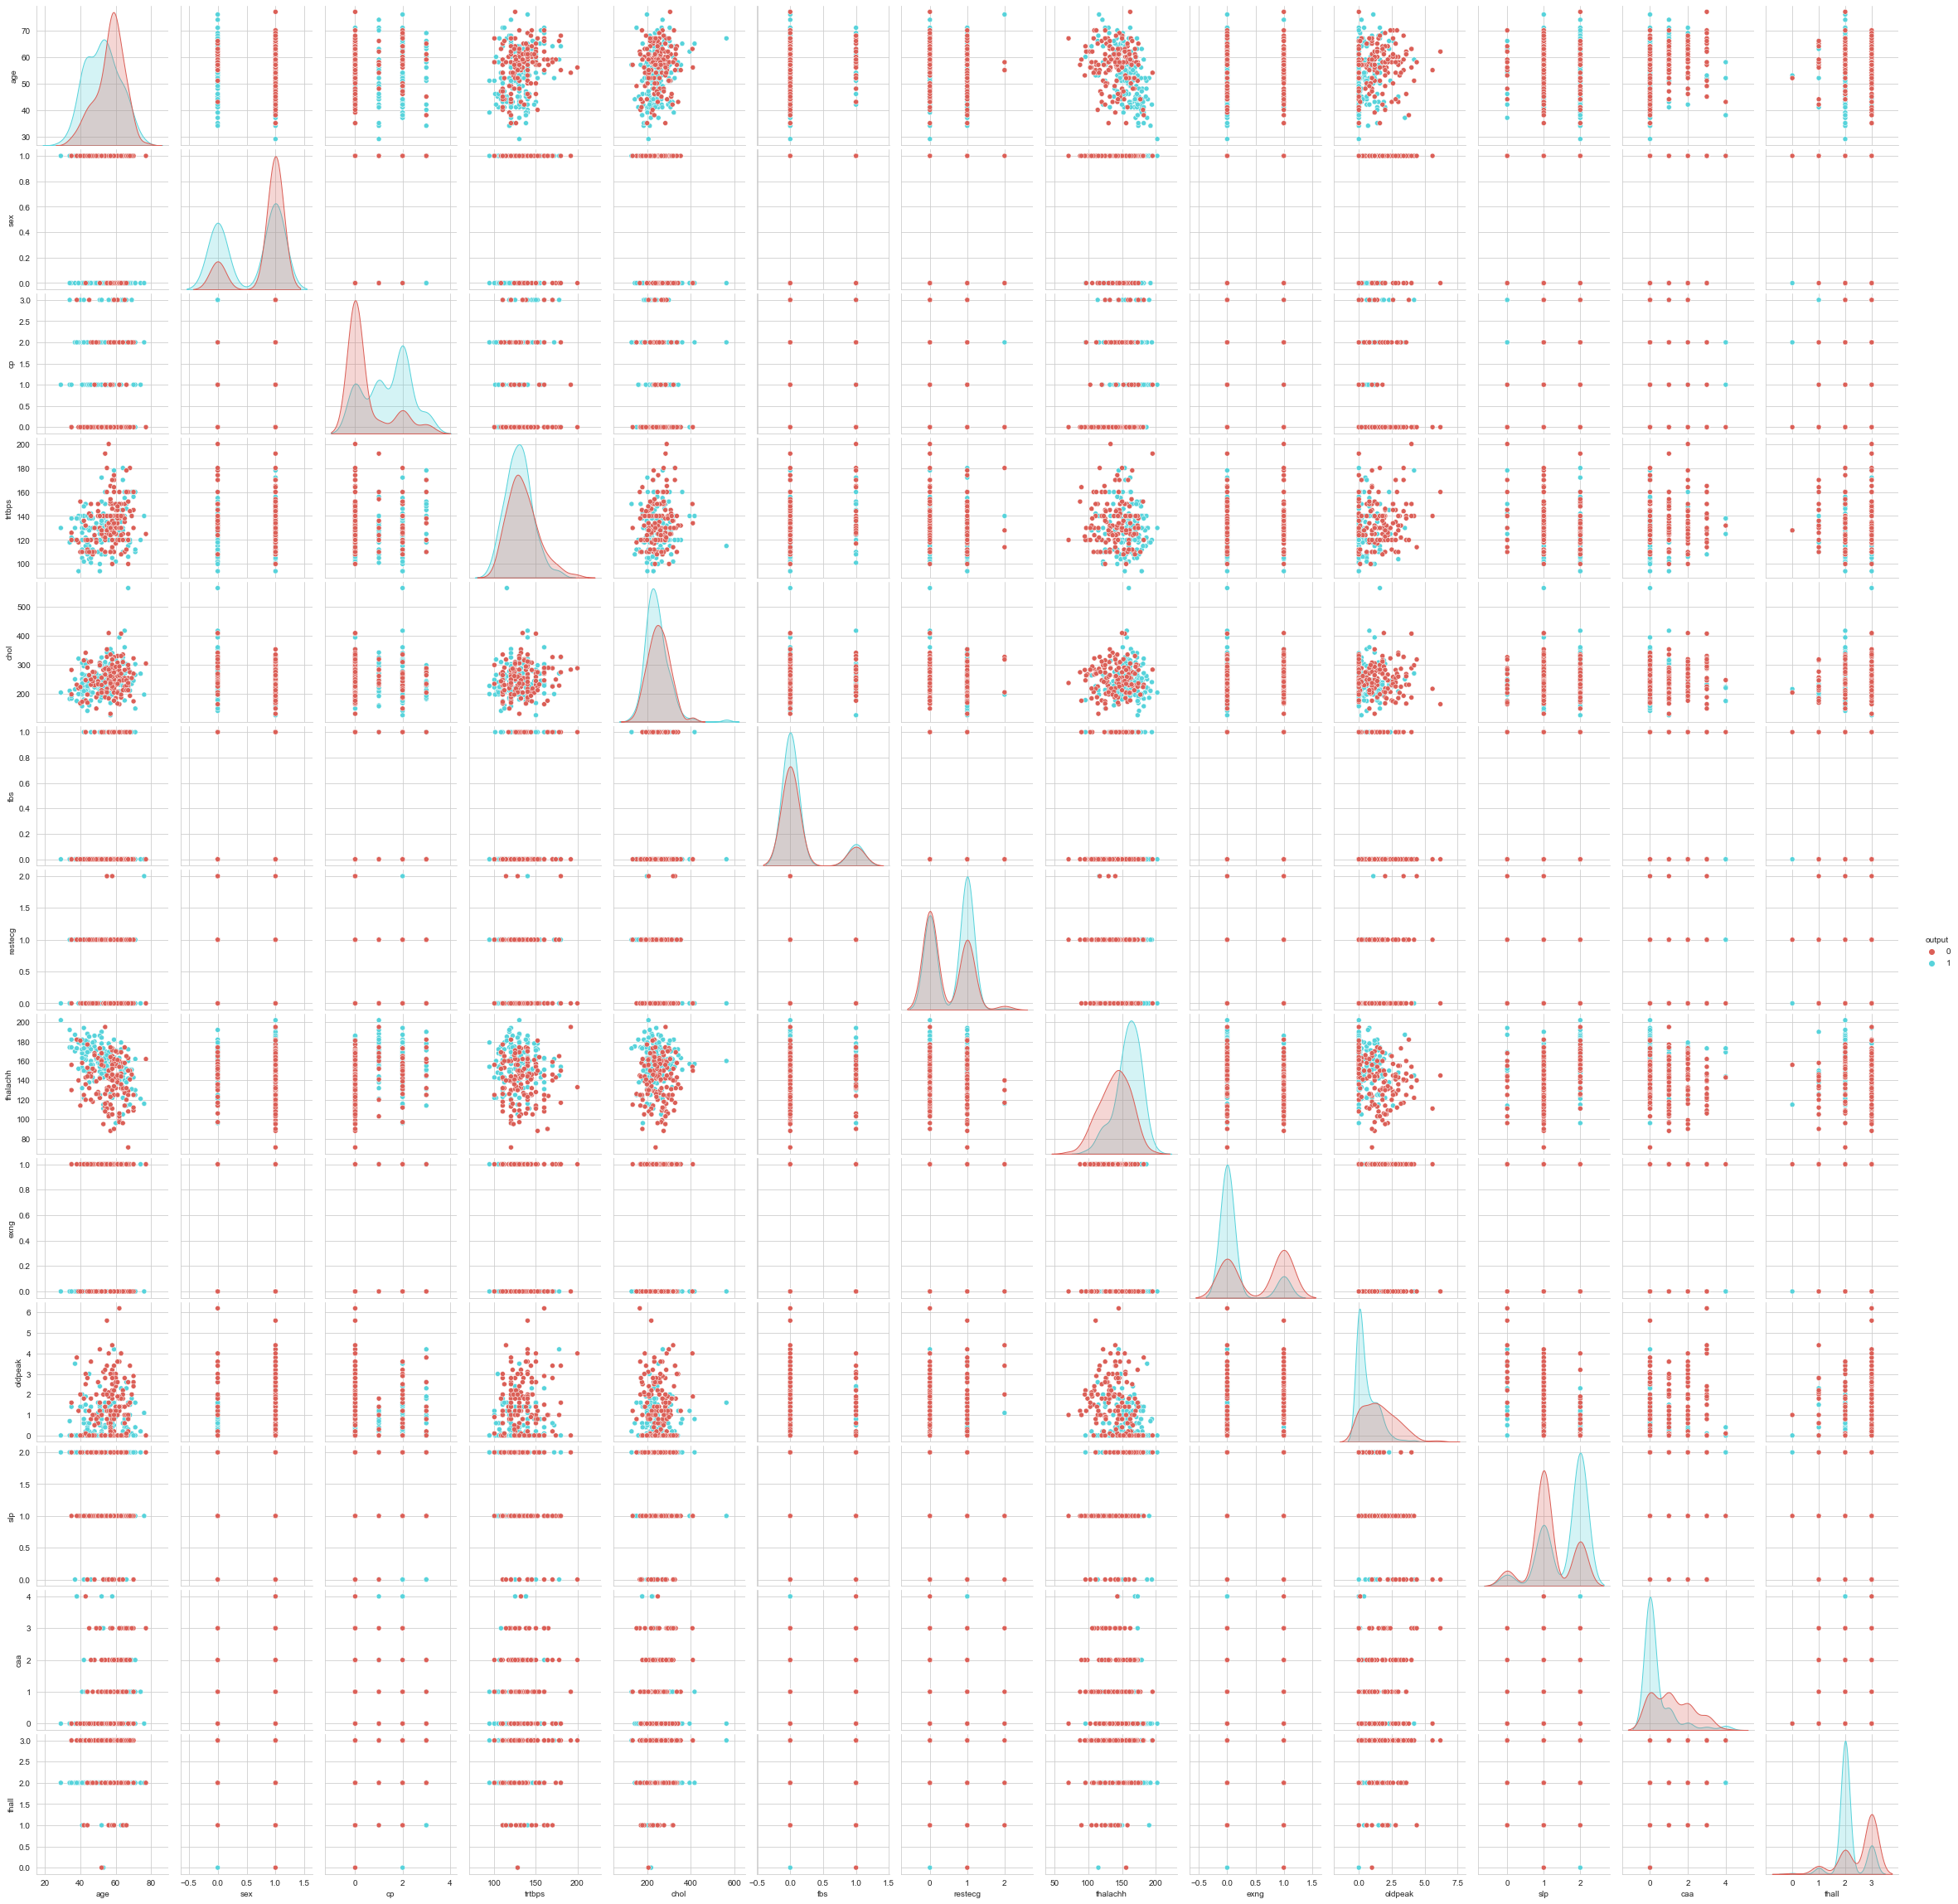

In [12]:
scatterplot_1 = sb.pairplot(df, hue='output', palette='hls')

plt.savefig('scatterplot_1.png', bbox_inches='tight', dpi=300, pad_inches=0.5, facecolor='w')

plt.show()

<AxesSubplot:xlabel='output', ylabel='age'>

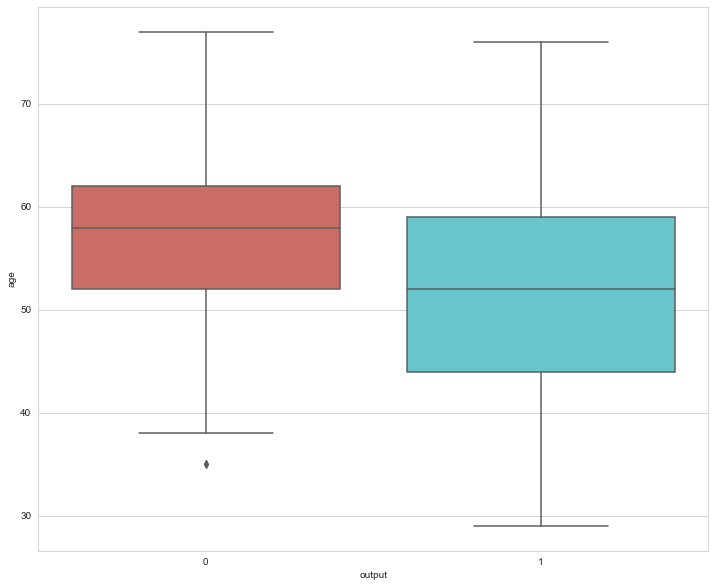

In [13]:
sb.boxplot(x='output', y='age', data=df, palette='hls')

<AxesSubplot:xlabel='output', ylabel='trtbps'>

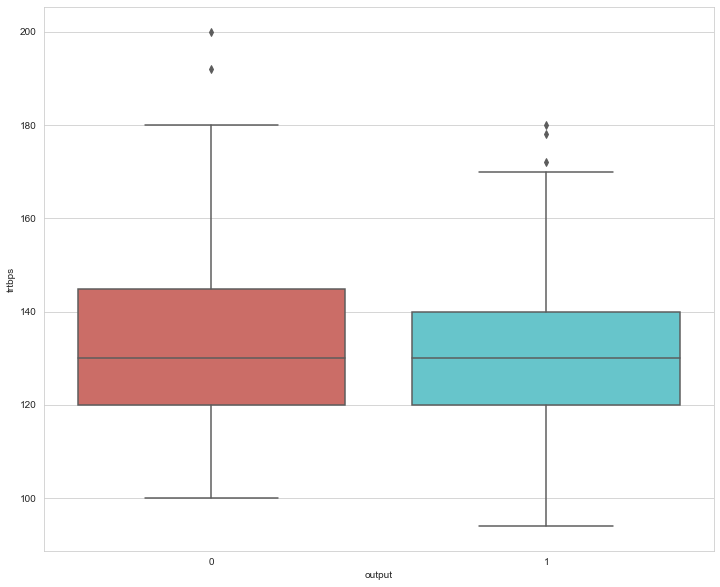

In [14]:
sb.boxplot(x='output', y='trtbps', data=df, palette='hls')

<AxesSubplot:xlabel='output', ylabel='chol'>

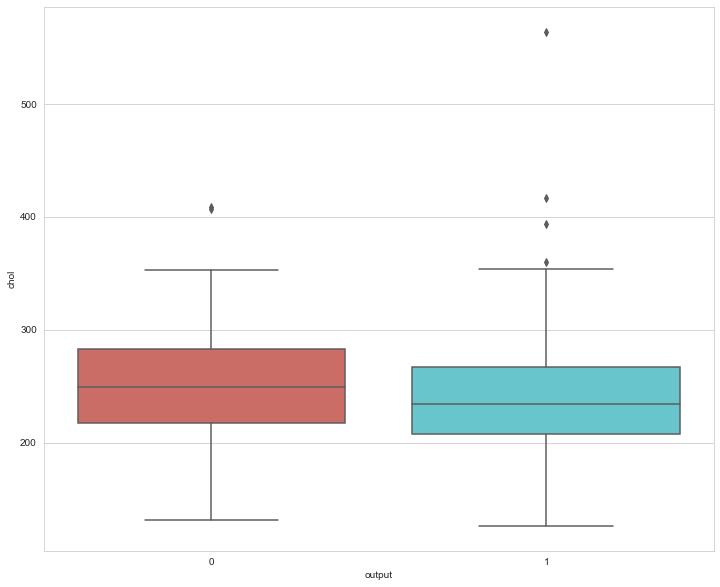

In [15]:
sb.boxplot(x='output', y='chol', data=df, palette='hls')

<AxesSubplot:xlabel='output', ylabel='oldpeak'>

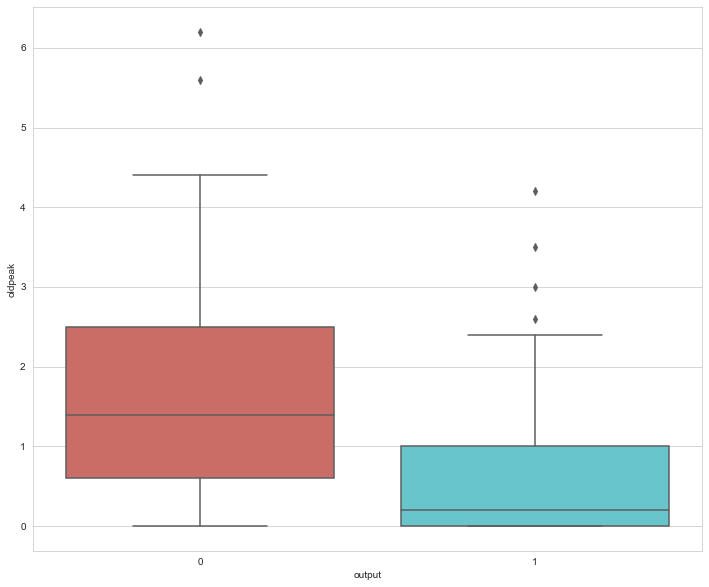

In [16]:
sb.boxplot(x='output', y='oldpeak', data=df, palette='hls')

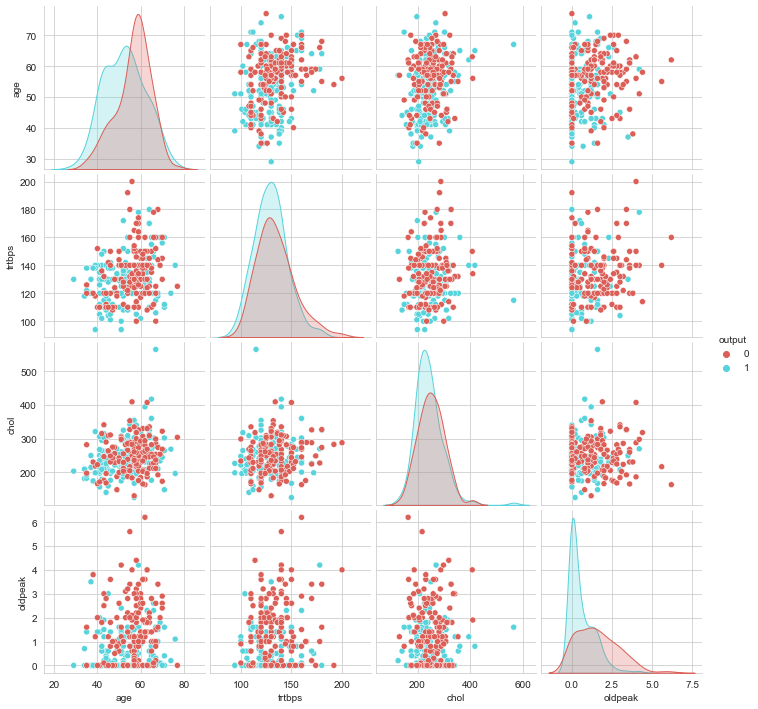

In [17]:
#scatter plot with outliers

df_outliers = df[['age', 'trtbps', 'chol', 'oldpeak', 'output']]

sb.pairplot(df_outliers, hue='output', palette='hls')

[]

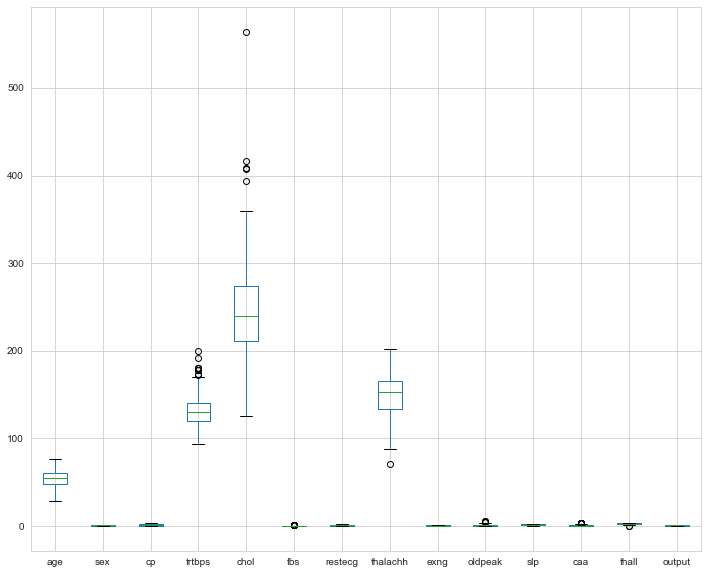

In [18]:
df.boxplot(return_type='dict')
plt.plot()

In [19]:
# Age : Age of the patient
# Sex : Sex of the patient
# exang: exercise induced angina (1 = yes; 0 = no)
# ca: number of major vessels (0-3)
# cp : Chest Pain type chest pain type

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic
# trtbps : resting blood pressure (in mm Hg)
# chol : cholestoral in mg/dl fetched via BMI sensor
# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# rest_ecg : resting electrocardiographic results

# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach : maximum heart rate achieved
# target : 0= less chance of heart attack 1= more chance of heart attack
# oldpeak: previous peak


In [20]:
#mapping categories
df['age'] = df['age'].astype('category')
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['trtbps'] = df['trtbps'].astype('category')
df['chol'] = df['chol'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exng'] = df['exng'].astype('category')
df['oldpeak'] = df['age'].astype('category')
df['slp'] = df['slp'].astype('category')
df['caa'] = df['caa'].astype('category')
df['thall'] = df['thall'].astype('category')
df['output'] = df['output'].astype('category')

#cat nodes on category to map all literals to numeric values
#not required as all are numeric values

df

age sex cp trtbps chol fbs restecg  thalachh exng oldpeak slp caa thall  \
0    63   1  3    145  233   1       0       150    0      63   0   0     1   
1    37   1  2    130  250   0       1       187    0      37   0   0     2   
2    41   0  1    130  204   0       0       172    0      41   2   0     2   
3    56   1  1    120  236   0       1       178    0      56   2   0     2   
4    57   0  0    120  354   0       1       163    1      57   2   0     2   
..   ..  .. ..    ...  ...  ..     ...       ...  ...     ...  ..  ..   ...   
298  57   0  0    140  241   0       1       123    1      57   1   0     3   
299  45   1  3    110  264   0       1       132    0      45   1   0     3   
300  68   1  0    144  193   1       1       141    0      68   1   2     3   
301  57   1  0    130  131   0       1       115    1      57   1   1     3   
302  57   0  1    130  236   0       0       174    0      57   1   1     2   

    output  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
298      0  
299      0  
300      0  
301      0  
302      0  

[303 rows x 14 columns]

In [21]:
#check if categories are balanced
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [22]:
#extract data and target from our dataframe
data = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
target = df['output'] #independent variable y
data

age sex cp trtbps chol fbs restecg  thalachh exng oldpeak slp caa thall
0    63   1  3    145  233   1       0       150    0      63   0   0     1
1    37   1  2    130  250   0       1       187    0      37   0   0     2
2    41   0  1    130  204   0       0       172    0      41   2   0     2
3    56   1  1    120  236   0       1       178    0      56   2   0     2
4    57   0  0    120  354   0       1       163    1      57   2   0     2
..   ..  .. ..    ...  ...  ..     ...       ...  ...     ...  ..  ..   ...
298  57   0  0    140  241   0       1       123    1      57   1   0     3
299  45   1  3    110  264   0       1       132    0      45   1   0     3
300  68   1  0    144  193   1       1       141    0      68   1   2     3
301  57   1  0    130  131   0       1       115    1      57   1   1     3
302  57   0  1    130  236   0       0       174    0      57   1   1     2

[303 rows x 13 columns]

In [23]:
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: category
Categories (2, int64): [0, 1]

In [24]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [25]:
x_test

age sex cp trtbps chol fbs restecg  thalachh exng oldpeak slp caa thall
179  57   1  0    150  276   0       0       112    1      57   1   1     1
228  59   1  3    170  288   0       0       159    0      59   1   0     3
111  57   1  2    150  126   1       1       173    0      57   2   1     3
246  56   0  0    134  409   0       0       150    1      56   1   2     3
60   71   0  2    110  265   1       0       130    0      71   2   1     2
..   ..  .. ..    ...  ...  ..     ...       ...  ...     ...  ..  ..   ...
22   42   1  0    140  226   0       1       178    0      42   2   0     2
258  62   0  0    150  244   0       1       154    1      62   1   0     2
56   48   1  0    122  222   0       0       186    0      48   2   0     2
242  64   1  0    145  212   0       0       132    0      64   1   2     1
114  55   1  1    130  262   0       1       155    0      55   2   0     2

[76 rows x 13 columns]

In [26]:
#import Time
import time

In [85]:
#import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#instantiate a decision tree model
dt = DecisionTreeClassifier(random_state=42)
start = int(round(time.time() * 1000))
dt.fit(x_train, y_train) #train model
end = int(round(time.time() * 1000))
print("Time taken (milliseconds): {0}".format(end-start))

#evaluate model
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))

Time taken (milliseconds): 7
0.8026315789473685


In [86]:
x_train

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
287   57    1   1     154   232    0        0       164     0   0.0000    2   
282   59    1   2     126   218    1        1       134     0   2.2000    1   
198   62    1   0     120   267    0        1        99     1   1.8000    1   
158   58    1   1     125   220    0        1       144     0   0.4000    1   
165   67    1   0     160   286    0        0       108     1   1.5000    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
189   41    1   0     110   172    0        0       158     0   0.0000    2   
71    51    1   2      94   227    0        1       154     1   0.0000    2   
106   69    1   3     160   234    1        0       131     0   0.1000    1   
271   61    1   3     134   234    0        1       145     0   2.6000    1   
102   63    0   1     140   195    0        1       179     0   0.0000    2   

     caa  thall  
287    1      2  
282    1      1  
198    2      3  
158    4      3  
165    3      2  
..   ...    ...  
189    0      3  
71     1      3  
106    1      2  
271    2      2  
102    2      2  

[226 rows x 13 columns]

In [87]:
y_train

287    0
282    0
198    0
158    1
165    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: output, Length: 226, dtype: int64

In [88]:
print(y_pred) #what the model predict entertainment labels
print(y_test) #true labels

[0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1]
180    0
229    0
111    1
247    0
60     1
      ..
22     1
259    0
56     1
243    0
114    1
Name: output, Length: 76, dtype: int64


In [89]:
#show the decision tree model
#import graphviz and sklearn tree
from sklearn import tree
import graphviz
from graphviz import Source

decisionTree1 = Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names=x_train.columns))
decisionTree1.format = 'png'
decisionTree1.render('decisionTree1', view=True)

'decisionTree1.png'

In [32]:
from sklearn import tree
import graphviz
from graphviz import Source

decisionTree2 = Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns))
decisionTree2.format = 'png'
decisionTree2.render('decisionTree2', view=True)

'decisionTree2.png'

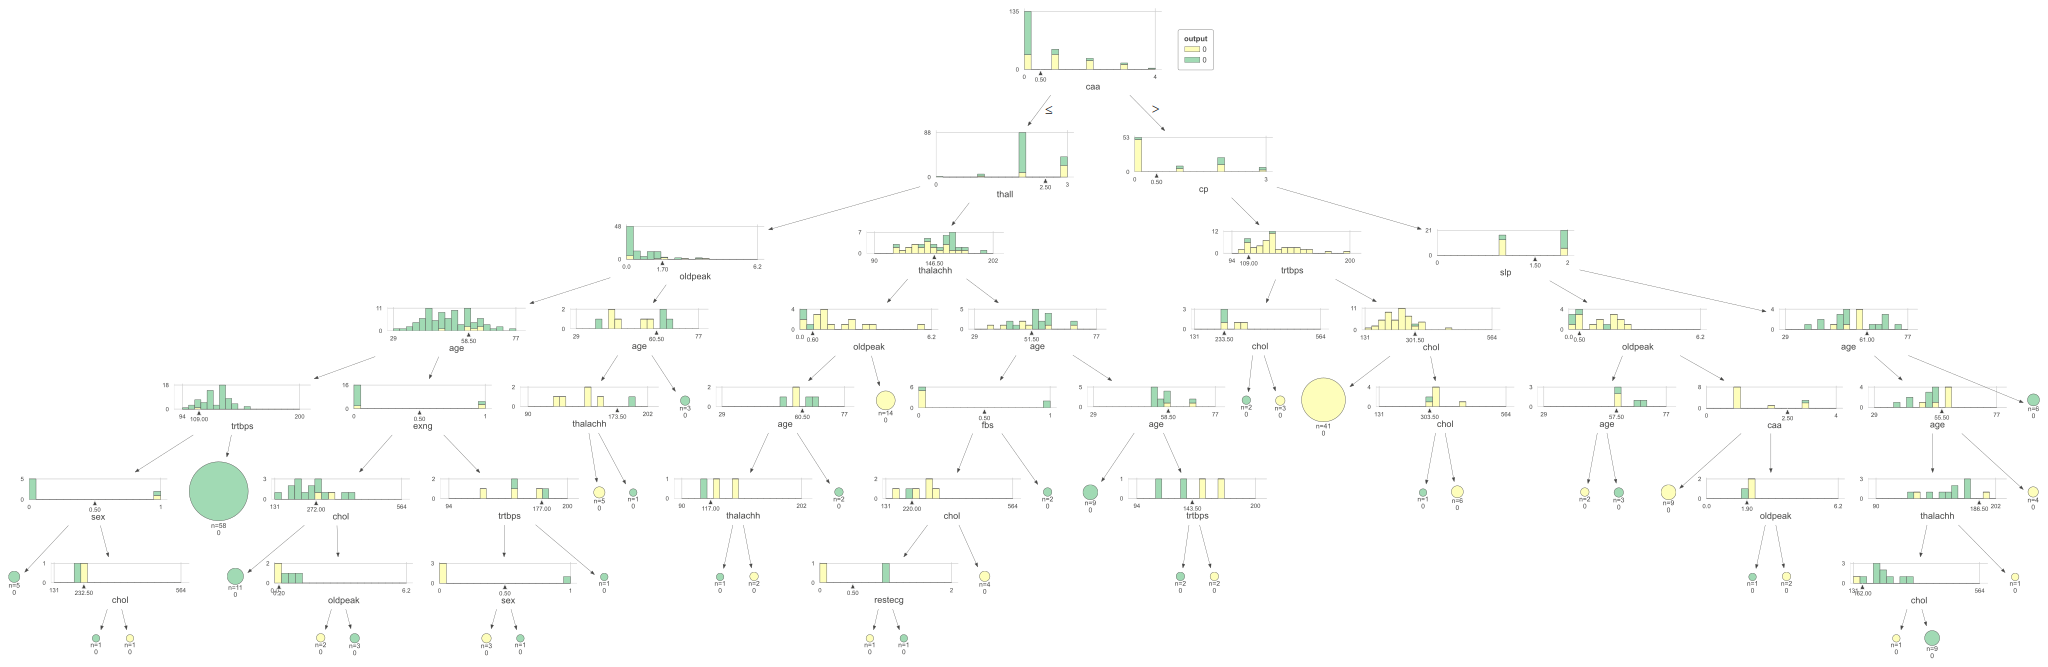

In [90]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt, x_train, y_train,
                target_name="output",
              feature_names=x_train.columns,
              class_names=list(y_train))

viz


In [34]:
viz.save('decision_tree_viz.svg')

In [91]:
#Predict values

print(dt.predict([[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]))
print(dt.predict([[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]]))

[1]
[1]


In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1, 0])

array([[30, 11],
       [ 4, 31]])

# Decision Tree with different hyperparameters

In [93]:
df_lg = pd.read_csv('heart.csv')
df_lg.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0   2.3000    0   
1   37    1   2     130   250    0        1       187     0   3.5000    0   
2   41    0   1     130   204    0        0       172     0   1.4000    2   
3   56    1   1     120   236    0        1       178     0   0.8000    2   
4   57    0   0     120   354    0        1       163     1   0.6000    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [94]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df_lg.iloc[:, :-1], df_lg['output'], random_state =42)

In [95]:
X2_train

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
287   57    1   1     154   232    0        0       164     0   0.0000    2   
282   59    1   2     126   218    1        1       134     0   2.2000    1   
197   67    1   0     125   254    1        1       163     0   0.2000    1   
158   58    1   1     125   220    0        1       144     0   0.4000    1   
164   38    1   2     138   175    0        1       173     0   0.0000    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
188   50    1   2     140   233    0        1       163     0   0.6000    1   
71    51    1   2      94   227    0        1       154     1   0.0000    2   
106   69    1   3     160   234    1        0       131     0   0.1000    1   
270   46    1   0     120   249    0        0       144     0   0.8000    2   
102   63    0   1     140   195    0        1       179     0   0.0000    2   

     caa  thall  
287    1      2  
282    1      1  
197    2      3  
158    4      3  
164    4      2  
..   ...    ...  
188    1      3  
71     1      3  
106    1      2  
270    0      3  
102    2      2  

[227 rows x 13 columns]

In [96]:
y2_train

287    0
282    0
197    0
158    1
164    1
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 227, dtype: int64

In [97]:
def decTreeScore2(crit = 'gini',  maxDepth = None, minSamples = 1, minSplit = 2):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    dect.fit(X2_train, y2_train)
    accuracy = accuracy_score(y2_test, dect.predict(X2_test))
    print(accuracy)
    return accuracy

In [98]:
start = int(round(time.time() * 1000))
decTreeScore2() #train model
end = int(round(time.time() * 1000))
print("Time taken (milliseconds): {0}".format(end-start))

# the accuracy score for our model with default hyperparams is about 0.80263

0.8026315789473685
Time taken (milliseconds): 13


In [99]:
decTreeScore2(crit = 'entropy')
# if we use entropy to calculate infomation gain instead of gini score, the accuracy drops to 0.7368

0.7368421052631579


0.7368421052631579

In [100]:
# use different maximum depth of the tree
for i in np.arange(1, 15, 1):
    decTreeScore2(maxDepth = i)
    
    
# from the result we see that when maximum depth allowed is 2 or 4, the accuracy score is highest

0.6842105263157895
0.8289473684210527
0.7763157894736842
0.8157894736842105
0.8026315789473685
0.7894736842105263
0.8026315789473685
0.7631578947368421
0.8026315789473685
0.8026315789473685
0.8026315789473685
0.8026315789473685
0.8026315789473685
0.8026315789473685


In [101]:
for i in np.arange(1, 15, 1):
    decTreeScore2(minSamples = i)
    
# when the minimum samples allowed in a leaf is  greater than 10, the accuracy score is the highest

0.8026315789473685
0.7763157894736842
0.7894736842105263
0.7763157894736842
0.7631578947368421
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.8157894736842105
0.8157894736842105
0.8157894736842105
0.8157894736842105
0.8157894736842105


In [102]:
for i in np.arange(2, 15,1):
    decTreeScore2(minSplit = i)
    
# the value of minimum samples required to split is highest when value is 4, 6, 7, 8

0.8026315789473685
0.7894736842105263
0.7763157894736842
0.8157894736842105
0.7894736842105263
0.8157894736842105
0.8157894736842105
0.8157894736842105
0.8026315789473685
0.8026315789473685
0.8026315789473685
0.8026315789473685
0.8026315789473685


# Data Engineering

In [103]:
df2 = pd.read_csv('heart.csv')
df2

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0   2.3000    0   
1     37    1   2     130   250    0        1       187     0   3.5000    0   
2     41    0   1     130   204    0        0       172     0   1.4000    2   
3     56    1   1     120   236    0        1       178     0   0.8000    2   
4     57    0   0     120   354    0        1       163     1   0.6000    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1   0.2000    1   
299   45    1   3     110   264    0        1       132     0   1.2000    1   
300   68    1   0     144   193    1        1       141     0   3.4000    1   
301   57    1   0     130   131    0        1       115     1   1.2000    1   
302   57    0   1     130   236    0        0       174     0   0.0000    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [104]:
df2.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [105]:
df2.duplicated().sum()

1

In [106]:
#drop duplicate
df2.drop_duplicates(inplace=True)
df2['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

In [107]:
df2.to_csv('heart_clean.csv', index=False)

In [108]:
data2 = np.loadtxt('heart_clean.csv', delimiter=',', dtype='str')
data2

array([['age', 'sex', 'cp', ..., 'caa', 'thall', 'output'],
       ['63', '1', '3', ..., '0', '1', '1'],
       ['37', '1', '2', ..., '0', '2', '1'],
       ...,
       ['68', '1', '0', ..., '2', '3', '0'],
       ['57', '1', '0', ..., '1', '3', '0'],
       ['57', '0', '1', ..., '1', '2', '0']], dtype='<U8')

In [109]:
data2.shape

(303, 14)

In [110]:
x1 = df2[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y1 = df2['output'] #independent variable y
data2

array([['age', 'sex', 'cp', ..., 'caa', 'thall', 'output'],
       ['63', '1', '3', ..., '0', '1', '1'],
       ['37', '1', '2', ..., '0', '2', '1'],
       ...,
       ['68', '1', '0', ..., '2', '3', '0'],
       ['57', '1', '0', ..., '1', '3', '0'],
       ['57', '0', '1', ..., '1', '2', '0']], dtype='<U8')

In [111]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, random_state=42)

In [113]:
#instantiate a decision tree model
dt = DecisionTreeClassifier(random_state=42)
start = int(round(time.time() * 1000))
dt.fit(x_train, y_train) #train model
end = int(round(time.time() * 1000))
print("Time taken (milliseconds): {0}".format(end-start))

#evaluate model
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))

Time taken (milliseconds): 6
0.8026315789473685


In [114]:
confusion_matrix(y_test, y_pred)

array([[31,  4],
       [11, 30]])

# Feature Selection - Correlation Matrix

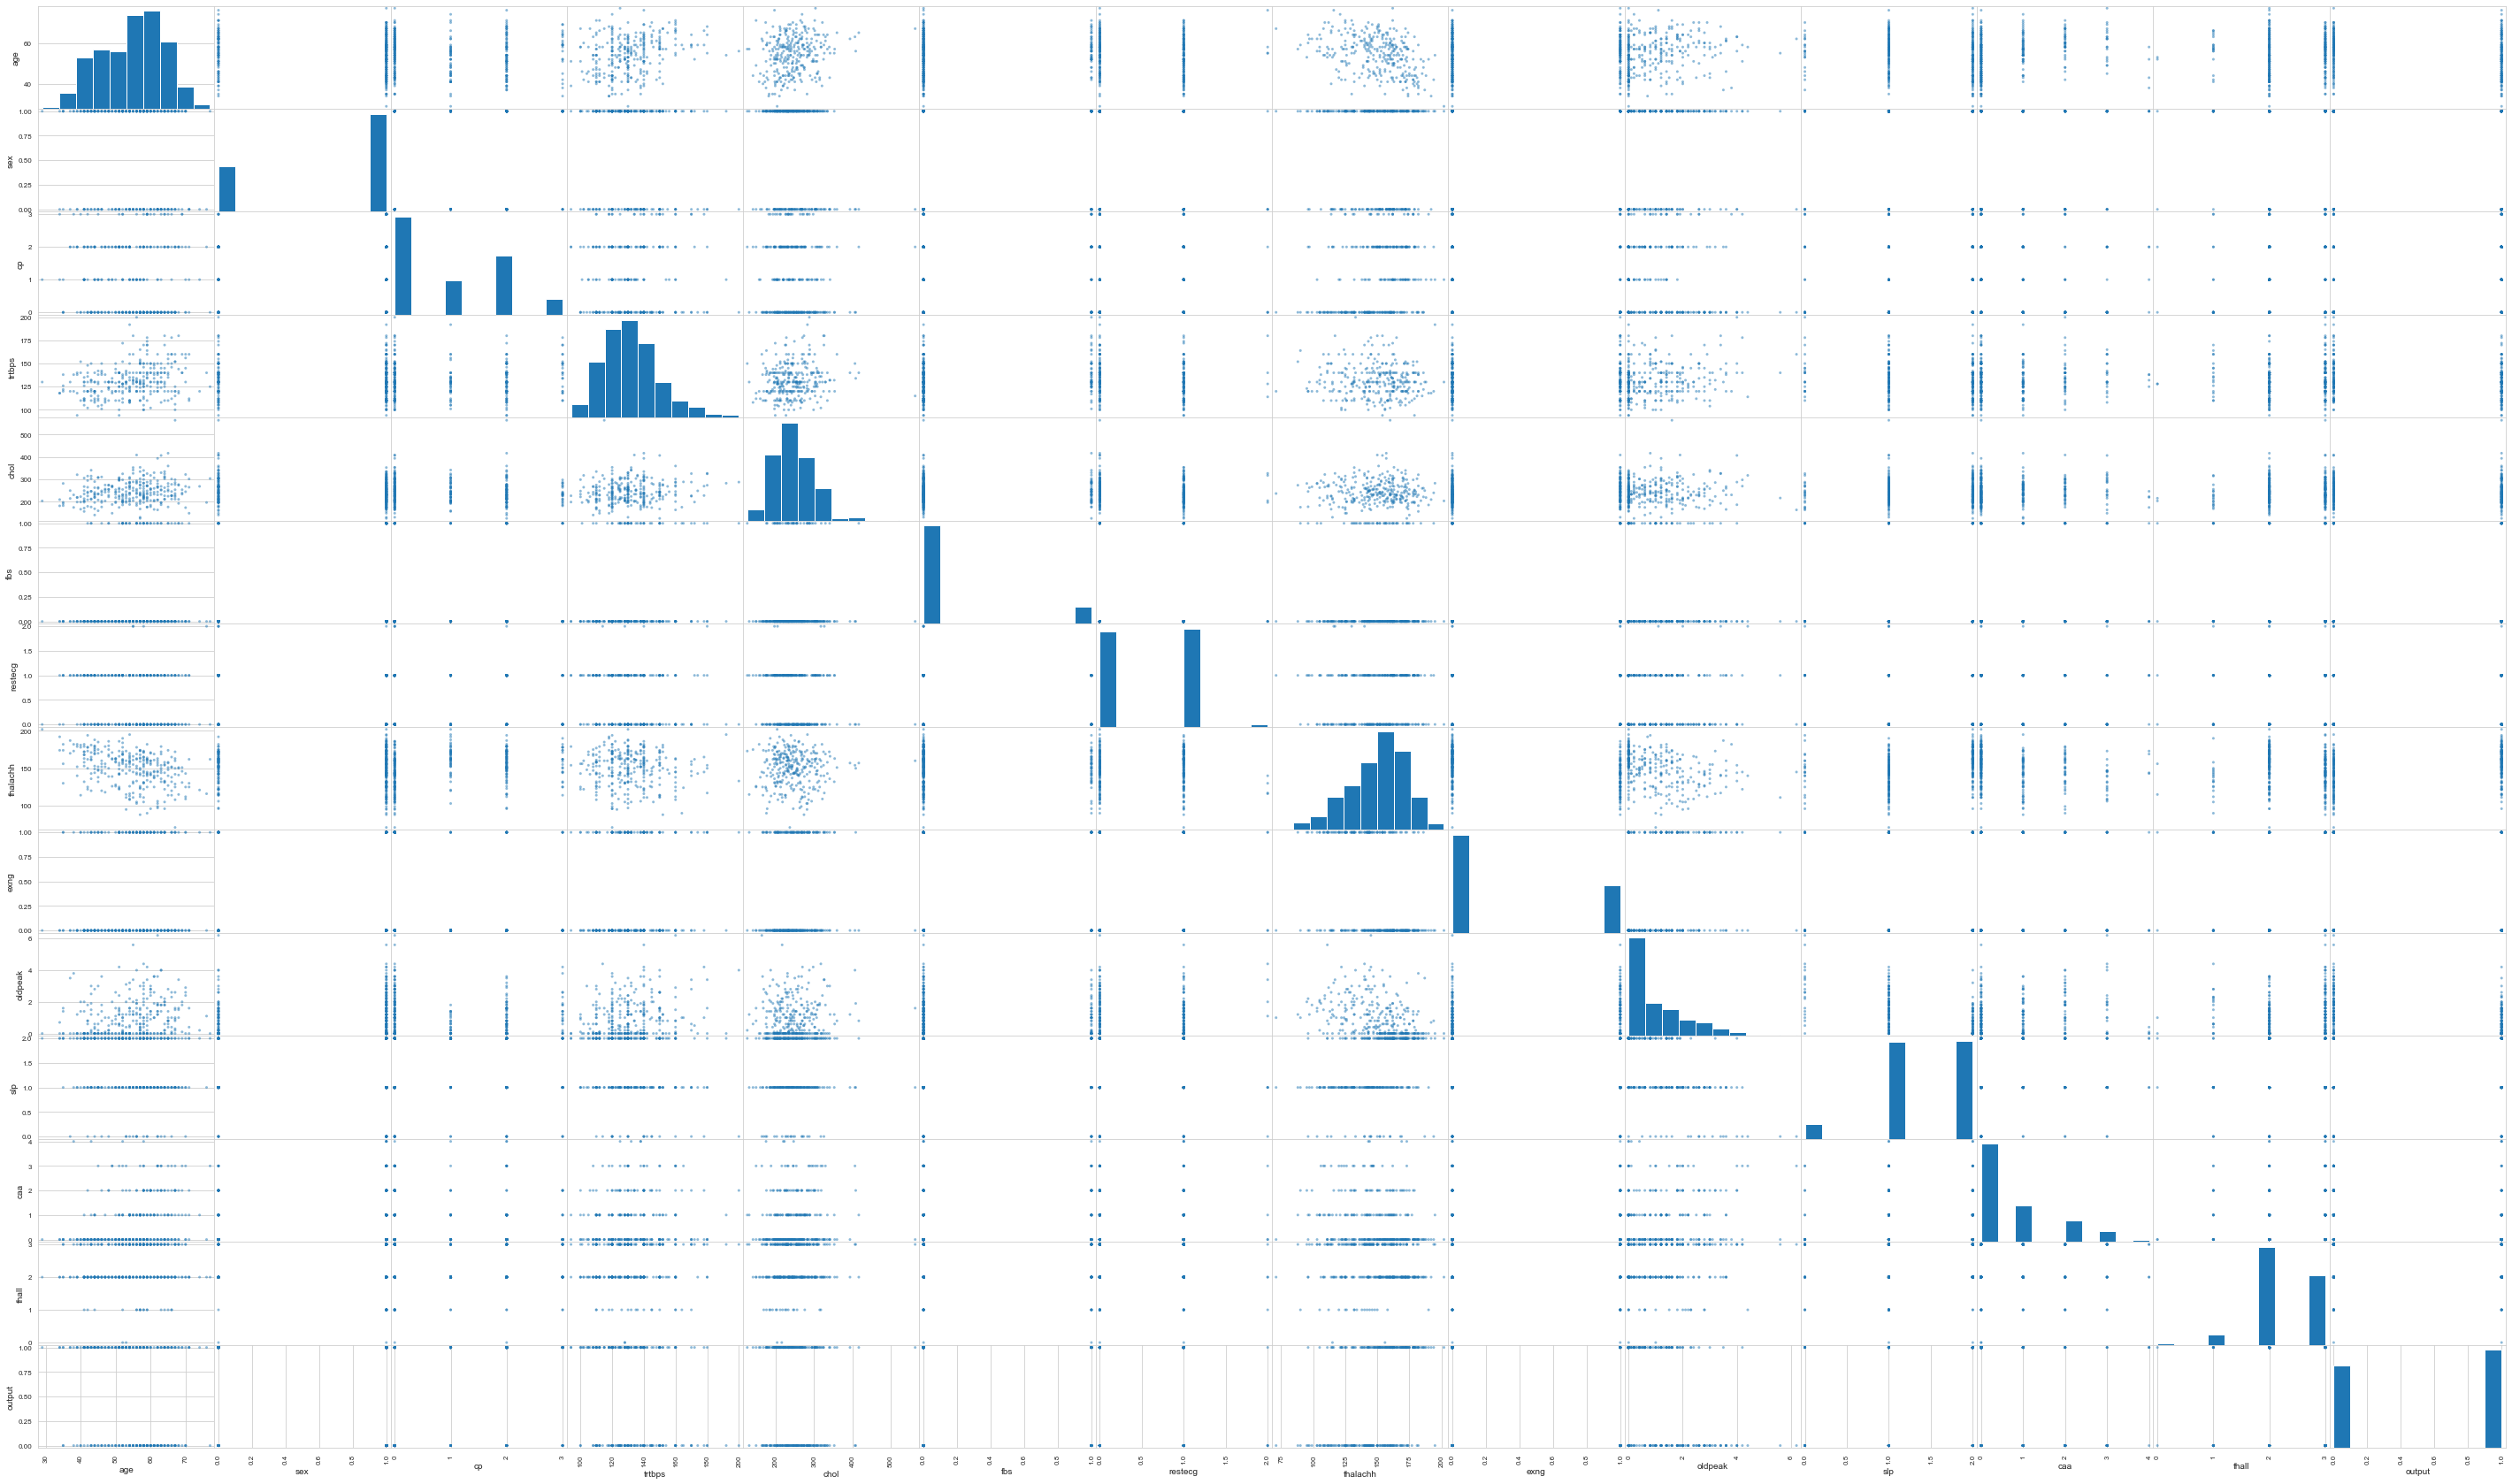

In [115]:
scatter_matrix(df2, figsize=(50,30))
plt.show()

In [116]:
colormap = sb.color_palette("viridis", as_cmap=True)

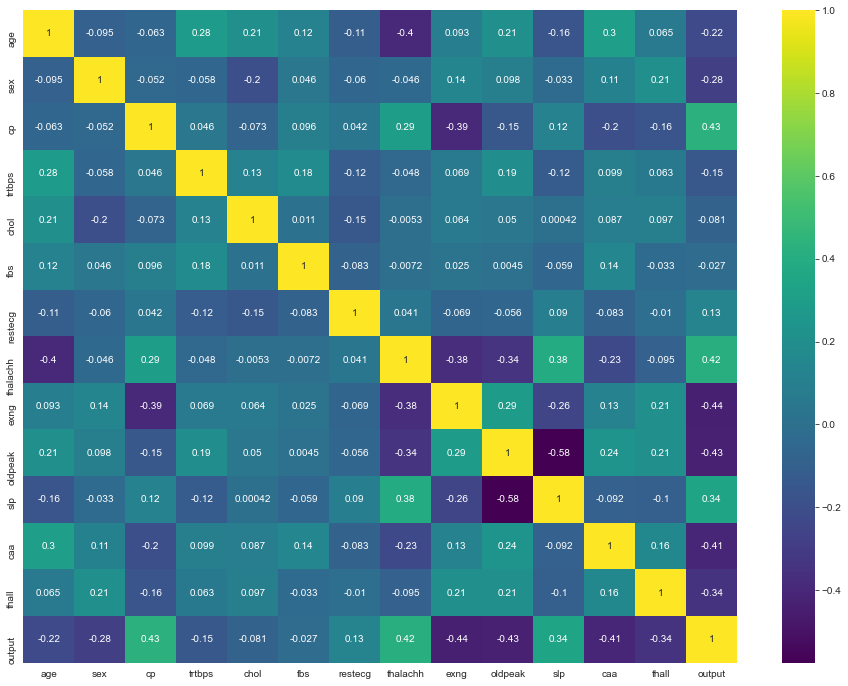

In [117]:
pearson_corr_mat = df2.corr()
plt.figure(figsize=(16,12))
sb.heatmap(data=pearson_corr_mat, annot=True, cmap=colormap)
plt.show()

In [118]:
pearson_corr_mat

age     sex      cp  trtbps    chol     fbs  restecg  thalachh  \
age       1.0000 -0.0950 -0.0631  0.2831  0.2072  0.1195  -0.1116   -0.3952   
sex      -0.0950  1.0000 -0.0517 -0.0576 -0.1956  0.0460  -0.0604   -0.0464   
cp       -0.0631 -0.0517  1.0000  0.0465 -0.0727  0.0960   0.0416    0.2934   
trtbps    0.2831 -0.0576  0.0465  1.0000  0.1253  0.1781  -0.1154   -0.0480   
chol      0.2072 -0.1956 -0.0727  0.1253  1.0000  0.0114  -0.1476   -0.0053   
fbs       0.1195  0.0460  0.0960  0.1781  0.0114  1.0000  -0.0831   -0.0072   
restecg  -0.1116 -0.0604  0.0416 -0.1154 -0.1476 -0.0831   1.0000    0.0412   
thalachh -0.3952 -0.0464  0.2934 -0.0480 -0.0053 -0.0072   0.0412    1.0000   
exng      0.0932  0.1435 -0.3929  0.0685  0.0641  0.0247  -0.0688   -0.3774   
oldpeak   0.2060  0.0983 -0.1467  0.1946  0.0501  0.0045  -0.0563   -0.3422   
slp      -0.1641 -0.0330  0.1169 -0.1229  0.0004 -0.0587   0.0904    0.3848   
caa       0.3023  0.1131 -0.1954  0.0992  0.0869  0.1449  -0.0831   -0.2283   
thall     0.0653  0.2115 -0.1604  0.0629  0.0968 -0.0328  -0.0105   -0.0949   
output   -0.2215 -0.2836  0.4321 -0.1463 -0.0814 -0.0268   0.1349    0.4200   

            exng  oldpeak     slp     caa   thall  output  
age       0.0932   0.2060 -0.1641  0.3023  0.0653 -0.2215  
sex       0.1435   0.0983 -0.0330  0.1131  0.2115 -0.2836  
cp       -0.3929  -0.1467  0.1169 -0.1954 -0.1604  0.4321  
trtbps    0.0685   0.1946 -0.1229  0.0992  0.0629 -0.1463  
chol      0.0641   0.0501  0.0004  0.0869  0.0968 -0.0814  
fbs       0.0247   0.0045 -0.0587  0.1449 -0.0328 -0.0268  
restecg  -0.0688  -0.0563  0.0904 -0.0831 -0.0105  0.1349  
thalachh -0.3774  -0.3422  0.3848 -0.2283 -0.0949  0.4200  
exng      1.0000   0.2868 -0.2561  0.1254  0.2058 -0.4356  
oldpeak   0.2868   1.0000 -0.5763  0.2366  0.2091 -0.4291  
slp      -0.2561  -0.5763  1.0000 -0.0922 -0.1033  0.3439  
caa       0.1254   0.2366 -0.0922  1.0000  0.1601 -0.4090  
thall     0.2058   0.2091 -0.1033  0.1601  1.0000 -0.3431  
output   -0.4356  -0.4291  0.3439 -0.4090 -0.3431  1.0000

In [119]:
target = 'output'
candidates_df = pearson_corr_mat[(pearson_corr_mat[target] >= 0.5) | (pearson_corr_mat[target] <= -0.5)]

# make the columns the same as indexes
indexes = set(candidates_df.index)
columns = set(candidates_df.columns)
diff = columns - indexes
candidates_df = candidates_df.drop(columns=diff)
candidates_df

output
output  1.0000

In [120]:
# remove highly positive correlated features

skip = [target]
accept = []
for entry in candidates_df.index:
    if entry not in skip and entry not in accept:
        similar_to_entry_s = candidates_df.loc[entry]
        
        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]
        
        similar_to_target_s = candidates_df.loc[similar_to_entry_s.index][target]
        
        top_feature = similar_to_target_s.abs().idxmax()
        
        accept.append(top_feature)
        
        skip += set(similar_to_entry_s.index) - {top_feature}

    
print('Skipped Features = ', skip)    
print('Selected Features = ', accept)

Skipped Features =  ['output']
Selected Features =  []


In [121]:
#Conclusion: nothing to remove.

# Trying with Feature Engineering

In [122]:
#Trying with PCA

In [123]:
x_scaled = StandardScaler().fit_transform(x1)

In [159]:
#find the suitable number of new features
n_com = np.arange(2, 13)
vs_arr = []
ac_arr = []


for n in n_com:
    pca = PCA(n_components=n)
    pc = pca.fit_transform(x_scaled)
    df_new = pd.DataFrame(pc)
    X = df_new
    y = df2['output']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

    
   
    dt2 = DecisionTreeClassifier(random_state=42)
    dt2.fit(X_train, y_train)
    ac = accuracy_score(y_test, dt2.predict(X_test))
    ac_arr.append(ac)
    
    vs_arr.append(pca.explained_variance_ratio_.sum())
    
df4 = pd.DataFrame(
    {"N Components": n_com,
     "Variance Sum": vs_arr,
     "Best Accuracy Score": ac_arr
     })
df4

N Components  Variance Sum  Best Accuracy Score
0              2        0.3317               0.7632
1              3        0.4253               0.7632
2              4        0.5165               0.7895
3              5        0.5952               0.7632
4              6        0.6698               0.7632
5              7        0.7363               0.8158
6              8        0.7963               0.7763
7              9        0.8506               0.7763
8             10        0.8985               0.7763
9             11        0.9390               0.7500
10            12        0.9714               0.7763

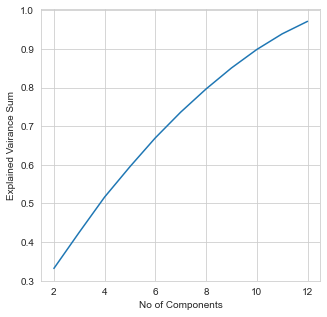

In [160]:
plt.figure(figsize=(5,5))
plt.plot(n_com, vs_arr)
plt.xlabel("No of Components")
plt.ylabel("Explained Vairance Sum")
plt.show()

In [161]:
pca = PCA(n_components=12)
pc = pca.fit_transform(x_scaled)

In [162]:
print(pc)

[[ 0.60302351  2.29191381 -2.8471531  ...  0.91614858 -0.56615196
   0.46426182]
 [-0.4785882  -0.98841636 -1.49266653 ...  1.21892699 -0.4036855
   0.23037127]
 [-1.84765545  0.02055853  0.35325155 ... -1.1005747   0.413551
   0.0949306 ]
 ...
 [ 2.4831852   0.50400093 -2.15856072 ... -0.83496892 -1.37894128
   0.91543701]
 [ 1.76206175 -2.33369747 -0.49594398 ... -0.97338343  0.35455283
  -0.07757623]
 [-0.86091503  1.06269601  0.64817655 ... -1.02903489  0.08992136
   0.34990669]]


In [163]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum()) # 85% with 9 principal components, 67% with 6 comps, 74% with 7 comps, 79% with 8 comps 

[0.21313479 0.11859478 0.09359819 0.09121102 0.07870341 0.07455984
 0.0665423  0.05996334 0.05432538 0.04787944 0.04045134 0.03239448]
0.971358315950386


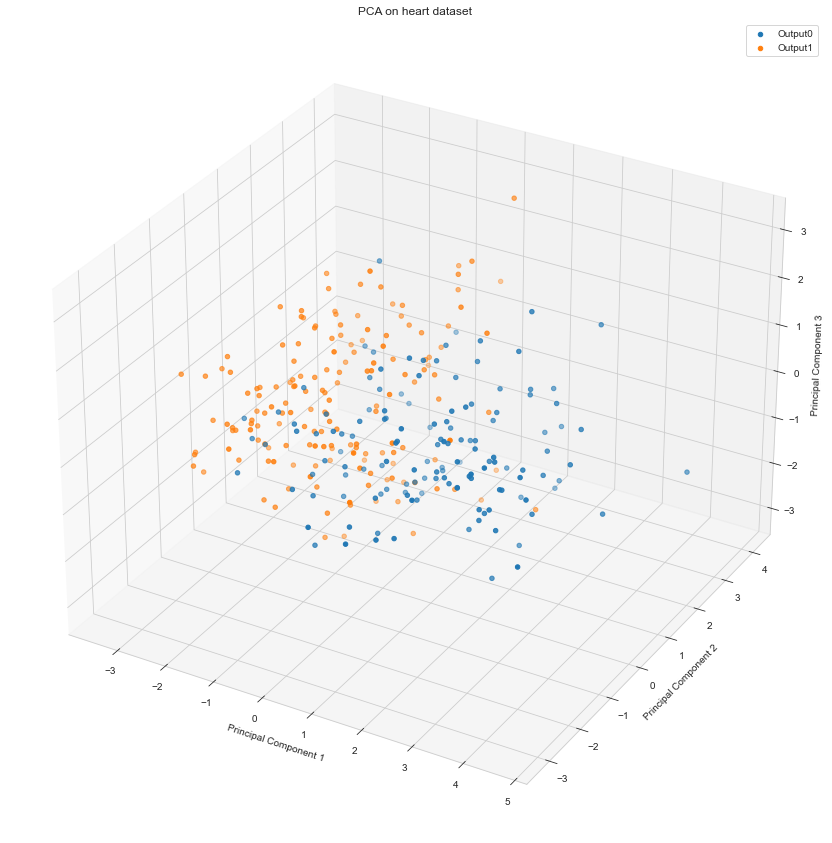

In [164]:
# #plotting
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

for i in np.unique(y1):
    pc_by_output = pc[y1==i]
    ax.scatter3D(xs=pc_by_output[:,0],
                ys=pc_by_output[:,1],
                zs=pc_by_output[:,2],
                label='Output' +str(i))

plt.title('PCA on heart dataset')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.legend()
plt.show()

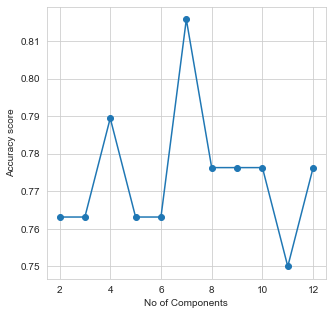

In [165]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(n_com, ac_arr, marker="o", label="Accuracy Score")
ax.set_xlabel("No of Components")
ax.set_ylabel("Accuracy score")
#ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

In [166]:
dt2 = DecisionTreeClassifier(random_state= 42)
dt2.fit(pc, y1) #train model

DecisionTreeClassifier(random_state=42)

In [167]:
X2_train, X2_test, y2_train, y2_test = train_test_split(pc, y1, random_state =42)

start = int(round(time.time() * 1000))
dt2.fit(X2_train, y2_train) #train model
end = int(round(time.time() * 1000))
print("Time taken (milliseconds): {0}".format(end-start))
y_pred1 = dt2.predict(X2_test)
print(accuracy_score(y2_test, y_pred1))

Time taken (milliseconds): 4
0.7763157894736842


In [157]:
#before Feature Engineering, 12ms, 77.6%
#after Feature Engineering, 2ms, 84.2%

In [158]:
confusion_matrix(y2_test, y_pred1)

array([[30,  5],
       [12, 29]])

In [139]:
df3 = pd.read_csv('heart.csv')

x3 = df3[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y3 = df3['output'].values
x3

array([[  3., 150.,   0., ...,   0.,   0.,   1.],
       [  2., 187.,   0., ...,   0.,   0.,   2.],
       [  1., 172.,   0., ...,   2.,   0.,   2.],
       ...,
       [  0., 141.,   0., ...,   1.,   2.,   3.],
       [  0., 115.,   1., ...,   1.,   1.,   3.],
       [  1., 174.,   0., ...,   1.,   1.,   2.]])

In [140]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x3, y3, random_state =42)
start = int(round(time.time() * 1000))
dt2.fit(X2_train, y2_train) #train model
end = int(round(time.time() * 1000))
print("Time taken (milliseconds): {0}".format(end-start))
y_pred1 = dt2.predict(X2_test)
print(accuracy_score(y2_test, y_pred1))

Time taken (milliseconds): 4
0.7236842105263158


In [84]:
confusion_matrix(y2_test, y_pred1)

array([[26,  9],
       [12, 29]])

# Random Forest Method with 100 Trees

In [141]:
df = pd.read_csv('heart.csv')
Train, Test = train_test_split(df)
X_test=Test.iloc[:,0:-1]
y_test=Test.iloc[:,-1]
print(Train.shape)
print(Test.shape)

(227, 14)
(76, 14)


In [142]:
X_train=Train.iloc[:,:-1]
y_train=Train['output']
Dt = DecisionTreeClassifier(random_state=42)
Dt.fit(X_train, y_train)
print(X_train.shape)
print(accuracy_score(y_test, Dt.predict(X_test)))

(227, 13)
0.7236842105263158


In [148]:
start=int(round(time.time()*1000))
Y_pred=pd.DataFrame()
for i in range(100):
    
    #randomly select 227 samples using bootstrap sampling method 
    Train_temp=Train.sample(n=Train.shape[0], replace=True, axis=0)     
    X_train=Train_temp.iloc[:,:-1].copy()
    y_train=Train_temp['output']
    
    #randomly select 4 features(set other features to be 0)
    X_train.iloc[:,np.random.choice(range(0,X_train.shape[1]),12,replace=False,p=[0.1,0.1,0.01,0.15,0.14,0.14,0.14,0.05,0.05,0.05,0.05,0.01,0.01])]=0
    
    #train a decision tree with selected samples and features
    dt = DecisionTreeClassifier()
    model = dt.fit(X_train, y_train)
    
    #store prediction of the i_th decision tree in Y_pred(i)
    Y_pred[i]=dt.predict(X_test)
    accuracy_pred = accuracy_score(y_test, Y_pred[i])    #calculate the accuracy
    print(accuracy_pred) 
    
end=int(round(time.time()*1000))
print('Time Taken(milliseconds):{0}'.format(end-start))

0.75
0.6578947368421053
0.7894736842105263
0.6578947368421053
0.75
0.7894736842105263
0.6447368421052632
0.6578947368421053
0.75
0.6578947368421053
0.7894736842105263
0.6447368421052632
0.75
0.75
0.6447368421052632
0.6578947368421053
0.7894736842105263
0.7894736842105263
0.6578947368421053
0.75
0.6578947368421053
0.6578947368421053
0.7894736842105263
0.6842105263157895
0.75
0.6578947368421053
0.6578947368421053
0.75
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.7894736842105263
0.75
0.6447368421052632
0.6447368421052632
0.7894736842105263
0.75
0.6578947368421053
0.75
0.7368421052631579
0.75
0.6447368421052632
0.7894736842105263
0.6578947368421053
0.7894736842105263
0.75
0.5131578947368421
0.7894736842105263
0.6578947368421053
0.75
0.75
0.6578947368421053
0.75
0.75
0.7894736842105263
0.6578947368421053
0.7894736842105263
0.6578947368421053
0.7368421052631579
0.6578947368421053
0.75
0.7894736842105263
0.7894736842105263
0.75
0.7894736842105263
0.7894736842

In [149]:
y_pred=Y_pred.mean(axis=1).round()           #vote for a y_pred by 1000 columns of Y_pred
accuracy = accuracy_score(y_test, y_pred)    #calculate the accuracy
print(accuracy)                              #the overall accuracy improved comparing with single decision tree

0.8421052631578947


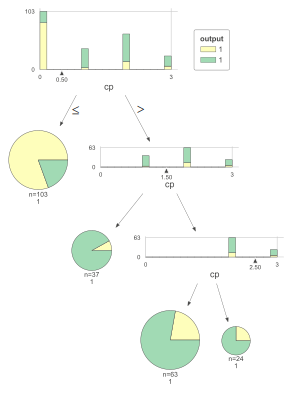

In [145]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt, X_train, y_train,
                target_name="output",
              feature_names=df.columns,
              class_names=list(df.output))

viz

In [146]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_2 <= 1.50
|   |   |--- class: 1
|   |--- feature_2 >  1.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  2.50
|   |   |   |--- class: 1



In [147]:
df.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype=object)